# Chapter 5 - Exercises

> Author : Badr TAJINI - Large Language model (LLMs) - ESIEE 2024-2025

---

# Exercise 5.1: Temperature-scaled softmax scores and sampling probabilities

**Empirical Analysis of Token Sampling Frequencies Under Temperature Scaling**

**Key Research Question: How does temperature-based scaling of the `softmax` probability distribution impact the sampling frequency of the specific lexical token `"pizza"`?**

*Methodological Framework:*
Utilize the `print_sampled_tokens` function to:
- Empirically examine token sampling probabilities
- Analyze the impact of temperature scaling
- Quantify the sampling occurrence of the `"pizza"` token

*Analytical Objectives:*
- Determine the precise sampling frequency of `"pizza"` across different temperature configurations
- Critically evaluate the current computational approach to sampling frequency measurement
- Explore potential methodological improvements for more efficient and accurate token sampling analysis

*Key Investigative Parameters:*
- Primary token of interest: `"pizza"`
- Sampling method: Temperature-scaled `softmax` distribution
- Computational tool: `print_sampled_tokens` function


In [1]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/badr/lab5')

Mounted at /content/drive


In [2]:
!pip install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.8 MB/s eta 0:00:00


In [3]:
import torch
from previous_labs import GPTModel
import matplotlib.pyplot as plt
from gpt_generate import generate, text_to_token_ids, token_ids_to_text, download_and_load_gpt2,load_weights_into_gpt
import tiktoken

forward


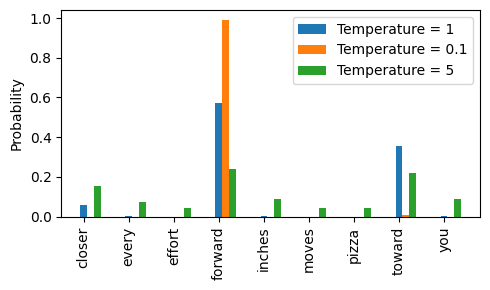

In [4]:
def print_sampled_tokens(probas):
    torch.manual_seed(123) # Manual seed for reproducibility
    sample = [torch.multinomial(probas, num_samples=1).item() for i in range(1_000)]
    sampled_ids = torch.bincount(torch.tensor(sample))
    for i, freq in enumerate(sampled_ids):
        print(f"{freq} x {inverse_vocab[i]}")

vocab = {
    "closer": 0,
    "every": 1,
    "effort": 2,
    "forward": 3,
    "inches": 4,
    "moves": 5,
    "pizza": 6,
    "toward": 7,
    "you": 8,
}

inverse_vocab = {v: k for k, v in vocab.items()}

# Suppose input is "every effort moves you", and the LLM
# returns the following logits for the next token:
next_token_logits = torch.tensor(
    [4.51, 0.89, -1.90, 6.75, 1.63, -1.62, -1.89, 6.28, 1.79]
)

probas = torch.softmax(next_token_logits, dim=0)
next_token_id = torch.argmax(probas).item()

# The next generated token is then as follows:
print(inverse_vocab[next_token_id])

def softmax_with_temperature(logits, temperature):
    scaled_logits = logits / temperature
    return torch.softmax(scaled_logits, dim=0)

# Temperature values
temperatures = [1, 0.1, 5]  # Original, higher confidence, and lower confidence

# Calculate scaled probabilities
scaled_probas = [softmax_with_temperature(next_token_logits, T) for T in temperatures]

# Plotting
x = torch.arange(len(vocab))
bar_width = 0.15

fig, ax = plt.subplots(figsize=(5, 3))
for i, T in enumerate(temperatures):
    rects = ax.bar(x + i * bar_width, scaled_probas[i], bar_width, label=f'Temperature = {T}')

ax.set_ylabel('Probability')
ax.set_xticks(x)
ax.set_xticklabels(vocab.keys(), rotation=90)
ax.legend()

plt.tight_layout()
plt.savefig("temperature-plot.pdf")
plt.show()

In [5]:
temp5_idx = 2
pizza_idx = 6

scaled_probas[temp5_idx][pizza_idx]

tensor(0.0430)

We can see that the word pizza has only a probability of temperature 5, which is the low confidence temperature. It has a very low chance of chosing pizza (and it won't). The word pizza is very specific, so a temperature based scaling won't help it because it needs very specific words before, and in this case there are not.

# Exercise 5.2: Different temperature and top-k settings

**Empirical Investigation of Generative Language Model Sampling Parameters**

**Key Research Question: How do variations in `temperature` and `top-k` sampling parameters influence the qualitative and probabilistic characteristics of token generation in stochastic language models?**

*Methodological Framework:*
Conduct a systematic empirical exploration of:
- Temperature scaling dynamics
- Top-k probability truncation mechanisms
- Generative output characteristics across different parameter configurations

*Analytical Objectives:*
- Identify contextual applications that benefit from lower `temperature` and `top-k` settings
- Explore potential use cases preferring higher `temperature` and `top-k` configurations
- Develop nuanced understanding of sampling parameter impact on generative outputs

*Investigative Dimensions:*
1. Low `temperature` and `top-k` Scenarios
   - Potential applications
   - Characteristics of generated outputs
   - Contextual relevance

2. High `temperature` and `top-k` Scenarios
   - Potential applications
   - Characteristics of generated outputs
   - Contextual relevance

*Recommended Experimental Protocol:*
1. Systematically vary `temperature` and `top-k` parameters
2. Meticulously document generative output characteristics
3. Critically analyze observed variations
4. Develop hypotheses about optimal parameter configurations for specific applications

In [6]:
torch.manual_seed(123)

tokenizer = tiktoken.get_encoding("gpt2")

GPT_CONFIG_124M = {
    "vocab_size": 50257,    # Vocabulary size
    "context_length": 1024, # Context length
    "emb_dim": 768,         # Embedding dimension
    "n_heads": 12,          # Number of attention heads
    "n_layers": 12,         # Number of layers
    "drop_rate": 0.1,       # Dropout rate
    "qkv_bias": False       # Query-Key-Value bias
}

model =  GPTModel(GPT_CONFIG_124M)

token_ids = generate(
    model=model,
    idx=text_to_token_ids("Every effort moves you", tokenizer),
    max_new_tokens=15,
    context_size=GPT_CONFIG_124M["context_length"],
    top_k=25,
    temperature=1.4
)

print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you Feature Bagg finally insurerggles Dean muttered suspected theory Components parallels western Substance unlocked attracted


In [7]:
token_ids = generate(
    model=model,
    idx=text_to_token_ids("Every effort moves you", tokenizer),
    max_new_tokens=15,
    context_size=GPT_CONFIG_124M["context_length"],
    top_k=50,
    temperature=1.4
)

print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves youdocumented DIDilogyhighIFTiness exoticopsis Powered migrexeGetting435 Termin -


In [8]:
token_ids = generate(
    model=model,
    idx=text_to_token_ids("Every effort moves you", tokenizer),
    max_new_tokens=15,
    context_size=GPT_CONFIG_124M["context_length"],
    top_k=50,
    temperature=0.7
)

print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves yoularg acknowled arsenal negligcruscape Tobias brace close Tom disgruntled Area Shots Nord belongs


In [9]:
token_ids = generate(
    model=model,
    idx=text_to_token_ids("Every effort moves you", tokenizer),
    max_new_tokens=15,
    context_size=GPT_CONFIG_124M["context_length"],
    top_k=5,
    temperature=0.7
)

print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you Ae frequencies drewouncing westernourage sungelect Ankara periphery Sketch Wildlife steppings Campbell


In [10]:
token_ids = generate(
    model=model,
    idx=text_to_token_ids("Every effort moves you", tokenizer),
    max_new_tokens=15,
    context_size=GPT_CONFIG_124M["context_length"],
    top_k=3,
    temperature=5
)

print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you slewfamily Surely amendment objectsThompsonRussia Solid openly 350 wheelsartmentsreq Protestants nick


Every tries are not good, specially when the temperature is too low and top_k too, the best configuration seems to be top_k = 25 and temperature = 1.4

# Exercise 5.3: Deterministic behavior in the decoding functions

**Deterministic Token Generation: Parametric Strategies for Eliminating Stochastic Variability**

**Key Research Question: What specific configuration parameters within the `generate` function can systematically eliminate randomness to ensure consistently reproducible generative outputs?**

*Methodological Framework:*
*Investigate comprehensive strategies to:*
- Suppress stochastic token generation mechanisms
- Enforce deterministic computational behavior
- Replicate the predictable output characteristics of `generate_simple`

*Analytical Objectives:*
- Identify all potential parameter combinations
- Systematically neutralize probabilistic sampling variations
- Establish deterministic generative protocol

*Critical Configuration Parameters to Examine:*
1. `temperature` scaling
2. `top_k` pruning mechanism
3. Random seed initialization
4. Sampling strategy selection

*Recommended Experimental Protocol:*
1. Analyze individual parameter impacts
2. Identify minimal configuration requirements
3. Validate deterministic output generation
4. Compare against `generate_simple` implementation

*Computational Implications:*
- Understanding stochastic suppression mechanisms
- Insights into generative model controllability
- Strategies for reproducible machine learning outputs

In [11]:
#In order to eliminate randomness, we have to set the seed :
torch.manual_seed(123)
#we have to set the temperature and top_k
temperature = 1.4

top_k = 25

token_ids = generate(
    model=model,
    idx=text_to_token_ids("Every effort moves you", tokenizer),
    max_new_tokens=15,
    context_size=GPT_CONFIG_124M["context_length"],
    top_k=top_k,
    temperature=temperature
)

print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you kidCarter donationswhite travelling Vertical 1977 sphericalPickFiles Grade brokers marched negativity aids


Every time I run it, it is the same output

# Exercise 5.4: Continued pretraining

**Continuation of Model Training: Stateful Resumption and Persistent Learning Dynamics**

**Key Research Question: How can we effectively restore a machine learning model's training state across separate computational sessions, enabling seamless continuation of the pretraining process?**

*Methodological Framework:*
Implement a comprehensive model and optimizer state restoration strategy involving:
- Weight reconstruction
- Optimizer state recovery
- Resumption of training from previously interrupted state

*Analytical Objectives:*
- Demonstrate stateful model persistence
- Execute additional training epoch using restored model configuration
- Validate continuity of learning progression

*Critical Procedural Steps:*
1. Load previously saved model weights
2. Reconstruct optimizer internal state
3. Reinitiate training using `train_model_simple` function
4. Complete one additional training epoch

*Recommended Implementation Strategy:*
- Utilize precise weight and optimizer state loading mechanisms
- Verify complete state restoration
- Execute uninterrupted additional training epoch

In [12]:
import os
import urllib.request

file_path = "the-verdict.txt"
url = "https://huggingface.co/datasets/DarwinAnim8or/the-verdict/blob/main/the-verdict.txt"

if not os.path.exists(file_path):
    with urllib.request.urlopen(url) as response:
        text_data = response.read().decode('utf-8')
    with open(file_path, "w", encoding="utf-8") as file:
        file.write(text_data)
else:
    with open(file_path, "r", encoding="utf-8") as file:
        text_data = file.read()

In [17]:
from previous_labs import create_dataloader_v1
from gpt_train import train_model_simple
# Train/validation ratio
train_ratio = 0.90
split_idx = int(train_ratio * len(text_data))
train_data = text_data[:split_idx]
val_data = text_data[split_idx:]

train_loader = create_dataloader_v1(
    train_data,
    batch_size=2,
    max_length=GPT_CONFIG_124M["context_length"],

    stride=GPT_CONFIG_124M["context_length"],
    drop_last=True,
    shuffle=True,
    num_workers=0
)

val_loader = create_dataloader_v1(
    val_data,
    batch_size=2,
    max_length=GPT_CONFIG_124M["context_length"],
    stride=GPT_CONFIG_124M["context_length"],
    drop_last=False,
    shuffle=False,
    num_workers=0
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [18]:
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0004, weight_decay=0.1)
torch.save({
    "model_state_dict": model.state_dict(),
    "optimizer_state_dict": optimizer.state_dict(),
    },
    "model_and_optimizer.pth"
)

In [19]:
checkpoint = torch.load("model_and_optimizer.pth")

model = GPTModel(GPT_CONFIG_124M)
model.load_state_dict(checkpoint["model_state_dict"])

optimizer = torch.optim.AdamW(model.parameters(), lr=0.0005, weight_decay=0.1)
optimizer.load_state_dict(checkpoint["optimizer_state_dict"])

<ipython-input-19-39a72726d664>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("model_and_optimizer.pth")


In [ ]:
train_model_simple(model, train_loader, val_loader, optimizer, device, 1,
                       5, 1, "Every effort moves you", tokenizer)

# Exercise 5.5: Training and validation set losses of the pretrained model

**Comparative Loss Assessment: Pretrained Model Performance on Specialized Textual Domain**

**Key Research Question: What are the comparative training and validation set losses when applying a pretrained OpenAI `GPTModel` to the "The Verdict" dataset?**

*Methodological Framework:*
Conduct a comprehensive loss evaluation involving:
- Model weight initialization from pretrained OpenAI configuration
- Computational loss calculation across training and validation datasets
- Quantitative performance assessment in domain-specific context

*Analytical Objectives:*
- Determine precise loss metrics for training dataset
- Calculate validation set loss
- Interpret performance characteristics of pretrained model on specialized textual domain

*Critical Computational Procedures:*
1. Load pretrained OpenAI `GPTModel` weights
2. Prepare "The Verdict" dataset
3. Compute training set loss
4. Compute validation set loss
5. Comparative loss analysis

*Investigative Parameters:*
- Model: Pretrained OpenAI `GPTModel`
- Dataset: "The Verdict"
- Metrics: Training and validation loss measurements

*Recommended Analytical Approach:*
- Implement precise loss computation
- Validate computational methodology
- Critically interpret loss metric implications

In [21]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,    # Vocabulary size
    "context_length": 1024, # Context length
    "emb_dim": 768,         # Embedding dimension
    "n_heads": 12,          # Number of attention heads
    "n_layers": 12,         # Number of layers
    "drop_rate": 0.1,       # Dropout rate
    "qkv_bias": False       # Query-Key-Value bias
}

model_configs = {
    "gpt2-small (124M)": {"emb_dim": 768, "n_layers": 12, "n_heads": 12},
    "gpt2-medium (355M)": {"emb_dim": 1024, "n_layers": 24, "n_heads": 16},
    "gpt2-large (774M)": {"emb_dim": 1280, "n_layers": 36, "n_heads": 20},
    "gpt2-xl (1558M)": {"emb_dim": 1600, "n_layers": 48, "n_heads": 25},
}

model_name = "gpt2-small (124M)"

NEW_CONFIG = GPT_CONFIG_124M.copy()
NEW_CONFIG.update(model_configs[model_name])
NEW_CONFIG.update({"context_length": 1024, "qkv_bias": True})

gpt = GPTModel(NEW_CONFIG)
gpt.eval();

In [22]:
settings, params = download_and_load_gpt2(model_size="124M", models_dir="gpt2")

checkpoint: 100%|██████████| 77.0/77.0 [00:00<00:00, 35.6kiB/s]
encoder.json: 100%|██████████| 1.04M/1.04M [00:00<00:00, 2.18MiB/s]
hparams.json: 100%|██████████| 90.0/90.0 [00:00<00:00, 199kiB/s]
model.ckpt.data-00000-of-00001: 100%|██████████| 498M/498M [00:52<00:00, 9.40MiB/s]
model.ckpt.index: 100%|██████████| 5.21k/5.21k [00:00<00:00, 2.20MiB/s]
model.ckpt.meta: 100%|██████████| 471k/471k [00:00<00:00, 1.29MiB/s]
vocab.bpe: 100%|██████████| 456k/456k [00:00<00:00, 1.43MiB/s]


In [23]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
load_weights_into_gpt(gpt, params)
gpt.to(device);

In [24]:
train_model_simple(gpt, train_loader, val_loader, optimizer, device,
    num_epochs=10, eval_freq=5, eval_iter=5,
    start_context="Every effort moves you", tokenizer=tokenizer
)

Ep 1 (Step 000000): Train loss 3.327, Val loss 4.998
Ep 1 (Step 000005): Train loss 3.574, Val loss 4.998
Ep 1 (Step 000010): Train loss 3.620, Val loss 4.998
Ep 1 (Step 000015): Train loss 3.055, Val loss 4.998
Ep 1 (Step 000020): Train loss 3.846, Val loss 4.998
Ep 1 (Step 000025): Train loss 3.160, Val loss 4.998
Ep 1 (Step 000030): Train loss 3.683, Val loss 4.998
Every effort moves you forward.  The first step is to understand the importance of your work.  The second step is to understand the importance of your work.  The third step is to understand the importance of your work.  The fourth step is
Ep 2 (Step 000035): Train loss 3.595, Val loss 4.998
Ep 2 (Step 000040): Train loss 4.000, Val loss 4.998
Ep 2 (Step 000045): Train loss 3.436, Val loss 4.998
Ep 2 (Step 000050): Train loss 2.885, Val loss 4.998
Ep 2 (Step 000055): Train loss 2.652, Val loss 4.998
Ep 2 (Step 000060): Train loss 3.562, Val loss 4.998
Every effort moves you forward.  The first step is to understand the imp

([3.326893997192383,
  3.5741648197174074,
  3.6199288845062254,
  3.0548882484436035,
  3.846469497680664,
  3.15981240272522,
  3.6834490299224854,
  3.595151948928833,
  4.000006055831909,
  3.43605637550354,
  2.884935665130615,
  2.65183002948761,
  3.562030553817749,
  3.722620725631714,
  3.673671102523804,
  3.890450191497803,
  4.0578537940979,
  4.315756607055664,
  3.5464313507080076,
  4.034902811050415,
  3.5117611408233644,
  3.2407078742980957,
  3.569169282913208,
  3.3615967273712157,
  3.8384416580200194,
  3.3904258489608763,
  3.2213782787323,
  3.037061071395874,
  3.326828384399414,
  3.4512562990188598,
  2.2804372787475584,
  3.518406534194946,
  4.160594320297241,
  2.576319932937622,
  3.1645838260650634,
  3.6065951347351075,
  3.515903902053833,
  4.154410791397095,
  2.955116534233093,
  3.587944841384888,
  3.8230707168579103,
  3.7109708309173586,
  2.449212574958801,
  3.7528478145599364,
  3.829493284225464,
  3.9027958869934083,
  3.906640625,
  3.7990

# Exercise 5.6: Trying larger models

**Comparative Generative Analysis: Scale and Performance Variations in GPT-2 Model Architectures**

**Key Research Question: How do generative text characteristics vary across different GPT-2 model scales, specifically comparing the 124 million and 1,558 million parameter configurations?**

*Methodological Framework:*
Conduct a systematic comparative investigation of:
- Generative text quality
- Semantic coherence
- Linguistic complexity
- Contextual understanding

*Analytical Objectives:*
- Empirically assess generative performance across model scales
- Identify qualitative differences in text generation
- Explore the relationship between model parameter count and generative capabilities

*Comparative Model Configurations:*
1. Smaller Model: **124 million parameters**
2. Larger Model: **1,558 million parameters**

*Investigative Dimensions:*
- Textual coherence
- Semantic precision
- Contextual relevance
- Linguistic nuance
- Complexity of generated content

*Experimental Protocol:*
1. Generate text samples using both model configurations
2. Conduct qualitative comparative analysis
3. Assess generative performance across multiple dimensions
4. Document observable variations in text generation characteristics

*Recommended Analytical Approach:*
- Utilize consistent generation parameters
- Employ multiple generation trials
- Implement rigorous qualitative assessment
- Develop comprehensive comparative framework

In [ ]:
model_name = "gpt2-xl (1558M)"
settings, params = download_and_load_gpt2(model_size="1558M", models_dir="gpt2")
load_weights_into_gpt(gpt2, params)
gpt2.to(device);
NEW_CONFIG2 = GPT_CONFIG_124M.copy()
NEW_CONFIG2.update(model_configs[model_name])
NEW_CONFIG2.update({"context_length": 1024, "qkv_bias": True})

gpt2 = GPTModel(NEW_CONFIG2)
gpt2.eval();

checkpoint: 100%|██████████| 77.0/77.0 [00:00<00:00, 83.4kiB/s]
encoder.json: 100%|██████████| 1.04M/1.04M [00:00<00:00, 1.94MiB/s]
hparams.json: 100%|██████████| 91.0/91.0 [00:00<00:00, 113kiB/s]
model.ckpt.data-00000-of-00001: 100%|██████████| 6.23G/6.23G [09:19<00:00, 11.1MiB/s]
model.ckpt.index: 100%|██████████| 20.7k/20.7k [00:00<00:00, 438kiB/s]
model.ckpt.meta: 100%|██████████| 1.84M/1.84M [00:00<00:00, 2.57MiB/s]
vocab.bpe: 100%|██████████| 456k/456k [00:00<00:00, 1.45MiB/s]


In [ ]:
train_model_simple(gpt2, train_loader, val_loader, optimizer, device,
    num_epochs=10, eval_freq=5, eval_iter=5,
    start_context="Every effort moves you", tokenizer=tokenizer
)